# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [387]:
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn as sk
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.datasets import load_digits, fetch_20newsgroups

from sklearn.feature_extraction.text import (
    CountVectorizer, TfidfTransformer, TfidfVectorizer
)

In [342]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [343]:
countries = pd.read_csv("countries.csv")

In [344]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [345]:
# Sua análise começa aqui.

countries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country             227 non-null object
Region              227 non-null object
Population          227 non-null int64
Area                227 non-null int64
Pop_density         227 non-null object
Coastline_ratio     227 non-null object
Net_migration       224 non-null object
Infant_mortality    224 non-null object
GDP                 226 non-null float64
Literacy            209 non-null object
Phones_per_1000     223 non-null object
Arable              225 non-null object
Crops               225 non-null object
Other               225 non-null object
Climate             205 non-null object
Birthrate           224 non-null object
Deathrate           223 non-null object
Agriculture         212 non-null object
Industry            211 non-null object
Service             212 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 35.5+ KB


In [346]:
countries.shape

(227, 20)

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [347]:
def q1():
    # Retorne aqui o resultado da questão 1.
    regions = countries['Region'].unique()
    regions = np.sort([i.strip() for i in regions])
    return list(regions)

q1(), type(q1())

(['ASIA (EX. NEAR EAST)',
  'BALTICS',
  'C.W. OF IND. STATES',
  'EASTERN EUROPE',
  'LATIN AMER. & CARIB',
  'NEAR EAST',
  'NORTHERN AFRICA',
  'NORTHERN AMERICA',
  'OCEANIA',
  'SUB-SAHARAN AFRICA',
  'WESTERN EUROPE'],
 list)

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [348]:
def q2():
    # Retorne aqui o resultado da questão 2.
    discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    pop_density = countries['Pop_density'].str.replace(',', '.').astype('float64')
   
    discretizer.fit(pop_density.values.reshape(-1, 1))
      
    return sum(pop_density > discretizer.bin_edges_[0][9])

    

q2(), type(q2())

(23, int)

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [402]:
def q3():
    # Retorne aqui o resultado da questão 3.    
    one_hot_encoder = OneHotEncoder()
    
    course_encoded = one_hot_encoder.fit_transform(countries[['Region', 'Climate']].fillna('null'))
    
    return course_encoded.shape[1]

q3(), type(q3())

(18, int)

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [350]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [351]:
numeric_countries = countries.copy()

for column in numeric_countries.select_dtypes('object').columns:
    numeric_countries[column] = numeric_countries[column].str.replace(',', '.')

numeric_countries = numeric_countries.apply(pd.to_numeric, errors='ignore')    

In [389]:
def q4():
    # Retorne aqui o resultado da questão 4.
    numeric_features = numeric_countries.select_dtypes(include=np.number).columns
    pipeline = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("std_scaler", StandardScaler())
    ])
    
    pipeline.fit(numeric_countries[numeric_features])
    
    output =  pipeline.transform(np.asarray(test_country[2:]).reshape(1,-1))
    
    return float(output[0][9].round(3))

q4(), type(q4())

(-1.047, float)

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

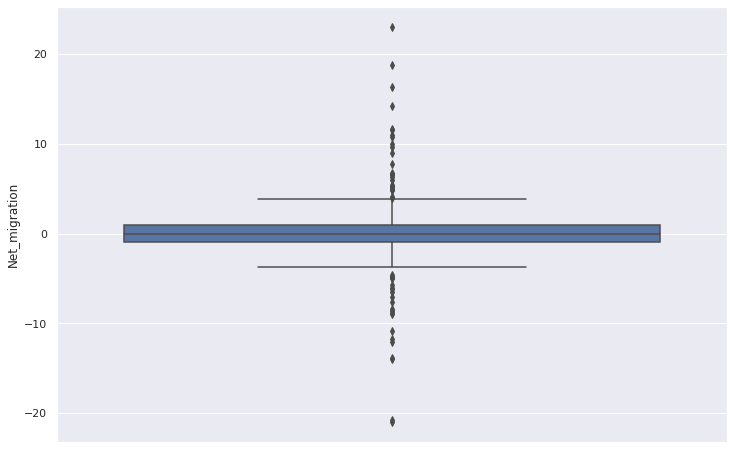

In [355]:
sns.boxplot(numeric_countries['Net_migration'].dropna(), orient='vertical')


In [386]:
def q5():
    # Retorne aqui o resultado da questão 4.
    net_migration = numeric_countries['Net_migration'].dropna()
    
    q1 = net_migration.quantile(0.25)
    q3 = net_migration.quantile(0.75)
    iqr = q3 - q1
    non_outlier_interval_iqr = [q1 - 1.5 * iqr, q3 + 1.5 * iqr]
    
    outliers_abaixo = net_migration[net_migration < non_outlier_interval_iqr[0]]
    outliers_acima = net_migration[net_migration > non_outlier_interval_iqr[1]]
    
    return outliers_abaixo.shape[0], outliers_acima.shape[0], False

q5(), type(q5())
    

((24, 26, False), tuple)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [358]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)



In [359]:
def q6():
    # Retorne aqui o resultado da questão 4.
    count_vectorizer = CountVectorizer()
    newsgroup_counts = count_vectorizer.fit_transform(newsgroup.data)
    word_idx = count_vectorizer.vocabulary_.get(f"phone")
    
    
    return int(newsgroup_counts[:, word_idx].toarray().sum())

q6(), type(q6())

(213, int)

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [360]:
def q7():
    # Retorne aqui o resultado da questão 4.
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_vectorizer.fit(newsgroup.data)
    newsgroups_tfidf_vectorized = tfidf_vectorizer.transform(newsgroup.data)
    word_idx = tfidf_vectorizer.vocabulary_.get(f"phone")
    return float(newsgroups_tfidf_vectorized[:, word_idx].toarray().sum().round(3))

q7(), type(q7())

(8.888, float)